In [1]:
##Importação das bibliotecas
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##importação do arquivo CSV
desafio = pd.read_csv("C:/Users/NB/Desktop/desafio/nubank-challenge-students/data/acquisition_train.csv", delimiter = ',', encoding='iso-8859-1', error_bad_lines=False )


In [3]:
##visualização das informações sobre as variavéis
desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
ids                                                 45000 non-null object
target_default                                      41741 non-null object
score_1                                             44438 non-null object
score_2                                             44438 non-null object
score_3                                             44438 non-null float64
score_4                                             45000 non-null float64
score_5                                             45000 non-null float64
score_6                                             45000 non-null float64
risk_rate                                           44438 non-null float64
last_amount_borrowed                                15044 non-null float64
last_borrowed_in_months                             15044 non-null float64
credit_limit                                        31200 non-null flo

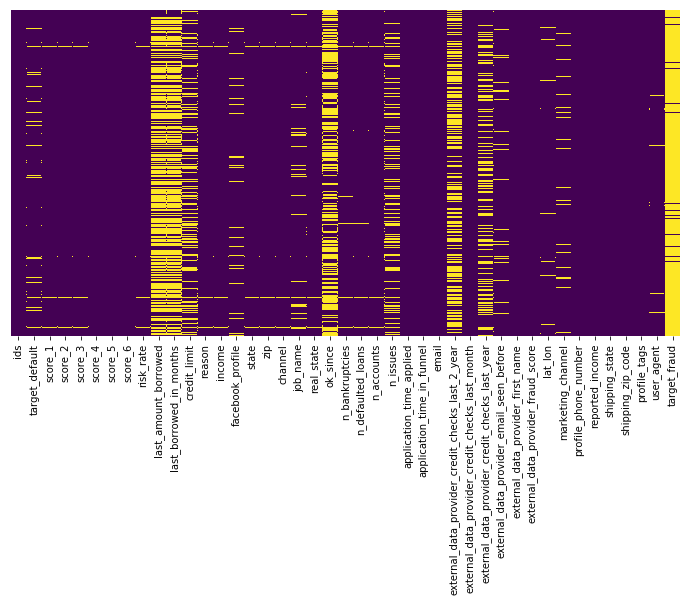

In [4]:
##visualização dos dados Faltantes
plt.figure(figsize=(12,6))
sns.heatmap(desafio.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [5]:
##tratamento dos dados faltantes com base na mediana
desafio['score_3'].fillna(value=desafio['score_3'].median(), inplace=True)
desafio['score_4'].fillna(value=desafio['score_4'].median(), inplace=True)
desafio['score_5'].fillna(value=desafio['score_5'].median(), inplace=True)
desafio['score_6'].fillna(value=desafio['score_6'].median(), inplace=True)
desafio['risk_rate'].fillna(value=desafio['risk_rate'].median(), inplace=True)
desafio['credit_limit'].fillna(value=desafio['credit_limit'].median(), inplace=True)
desafio['income'].fillna(value=desafio['income'].median(), inplace=True)
desafio['n_bankruptcies'].fillna(value=desafio['n_bankruptcies'].median(), inplace=True)
desafio['n_defaulted_loans'].fillna(value=desafio['n_defaulted_loans'].median(), inplace=True)
desafio['n_accounts'].fillna(value=desafio['n_accounts'].median(), inplace=True)
desafio['n_issues'].fillna(value=desafio['n_issues'].median(), inplace=True)
desafio['application_time_in_funnel'].fillna(value=desafio['application_time_in_funnel'].median(), inplace=True)


In [6]:
##tratamento da coluna fraud
desafio['target_fraud'].fillna(value=2, inplace=True)


In [7]:
##categorias da coluna fraud
desafio['target_fraud'].value_counts()

2                       43478
fraud_friends_family      904
fraud_id                  618
Name: target_fraud, dtype: int64

In [8]:
##visualização da coluna indadimplência
desafio['target_default'].value_counts()

False    35080
True      6661
Name: target_default, dtype: int64

In [9]:
##filtragrem de clientes inadimplementes
inad = desafio[desafio['target_default']==True]

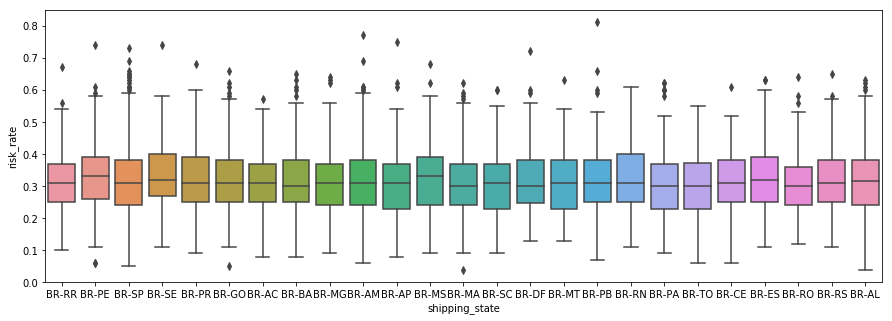

In [13]:
## risco de clientes indadimplmentes 
plt.figure(figsize=(15,5))

sns.boxplot(y='risk_rate', x='shipping_state', data=inad)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x360 with 0 Axes>

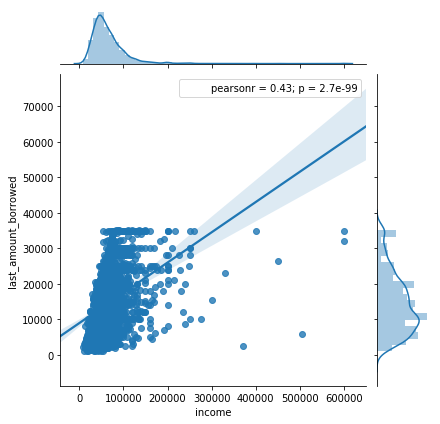

In [17]:
##valor de renda x empréstimo soliciado ao clientes tomado por clientes inadimplementes
plt.figure(figsize=(10,5))

sns.jointplot(x='income', y='last_amount_borrowed', data=inad, kind='reg')






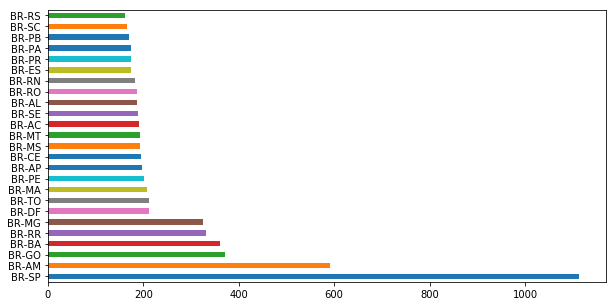

In [26]:
##inadimplemntes por estado
plt.figure(figsize=(10,5))

inad['shipping_state'].value_counts().plot.barh()

Text(0.5,0,'risk_rate')

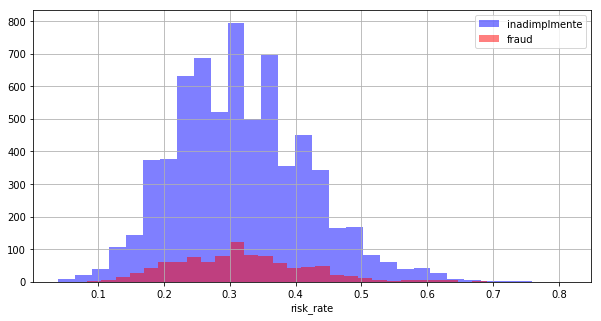

In [27]:
##comparativo entre inadimplementes e fraudadores
plt.figure(figsize=(10,5))
inad[inad['target_default']==True]['risk_rate'].hist(alpha=0.5, color='blue', bins=30, label='inadimplmente')
inad[inad['target_fraud']!=2]['risk_rate'].hist(alpha=0.5, color='red', bins=30, label='fraud')
plt.legend()
plt.xlabel('risk_rate')


In [29]:
##importação das bibliotecas para seleção de variavéis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
## tratamento dos para prever a inadimplência 
inadimplente2 = pd.get_dummies(desafio['target_default'], drop_first=True)

In [31]:
## concatenar dados dumbies na base total de clientes
desafio = pd.concat([desafio,inadimplente2], axis=1)
desafio.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud,True
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,2,0
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,2,0
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,2,1
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,2,0
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,2,0


In [32]:
## Após o tratamento de dados faltantes por mediana seleção de variáveis 
X = desafio[[
    'risk_rate',
    'credit_limit',
    'income',
    'n_bankruptcies',
    'n_defaulted_loans',
    'n_accounts',
    'n_issues'
]]




In [33]:
## seleção da variável alvo para prever inadimplemncia 
y=desafio[True]

In [34]:
## impoartação da biblioteca 
from sklearn.ensemble import ExtraTreesClassifier

In [35]:
##treino do modelo
modelo = ExtraTreesClassifier()
modelo.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
## nível de importância da variáveis preditoras 
print(modelo.feature_importances_)

[0.1644016  0.24407101 0.47070394 0.00571155 0.00112169 0.06889222
 0.045098  ]


In [38]:
##primeiro modelo random forest
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(n_estimators=500)
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
from sklearn.cross_validation import train_test_split
X_train, X_test, y_tran, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
rcf.fit(X_train, y_tran)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
rcf.score(X, y, sample_weight=None)

0.9519111111111112

In [42]:
pred = rcf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [44]:
print(rcf)
y_expect = y_test
previsores2 = rcf.predict(X_test)
precisao2 = accuracy_score(y_test, pred)
print(precisao2)
print(classification_report(y_test, pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.8397037037037037
             precision    recall  f1-score   support

          0       0.85      0.98      0.91     11510
          1       0.16      0.02      0.04      1990

avg / total       0.75      0.84      0.78     13500



In [45]:
matriz = confusion_matrix(y_test, previsores2)
print(matriz)

[[11296   214]
 [ 1950    40]]


In [46]:
##impoartacao dados test
test = pd.read_csv("C:/Users/NB/Desktop/desafio/nubank-challenge-students/data/acquisition_test.csv", delimiter = ',', encoding='iso-8859-1', error_bad_lines=False )


In [47]:
test['score_3'].fillna(value=test['score_3'].median(), inplace=True)
test['score_4'].fillna(value=test['score_4'].median(), inplace=True)
test['score_5'].fillna(value=test['score_5'].median(), inplace=True)
test['score_6'].fillna(value=test['score_6'].median(), inplace=True)
test['risk_rate'].fillna(value=test['risk_rate'].median(), inplace=True)
test['credit_limit'].fillna(value=test['credit_limit'].median(), inplace=True)
test['income'].fillna(value=test['income'].median(), inplace=True)
test['n_bankruptcies'].fillna(value=test['n_bankruptcies'].median(), inplace=True)
test['n_defaulted_loans'].fillna(value=test['n_defaulted_loans'].median(), inplace=True)
test['n_accounts'].fillna(value=test['n_accounts'].median(), inplace=True)
test['n_issues'].fillna(value=test['n_issues'].median(), inplace=True)
test['application_time_in_funnel'].fillna(value=test['application_time_in_funnel'].median(), inplace=True)


In [51]:
##definição de dados de test
x2 = test[[
    'risk_rate',
    'credit_limit',
    'income',
    'n_bankruptcies',
    'n_defaulted_loans',
    'n_accounts',
    'n_issues'
]]


In [52]:
##probalidade dos dados
pred = rcf.predict_proba(x2)
pred

array([[0.656, 0.344],
       [0.98 , 0.02 ],
       [0.796, 0.204],
       ...,
       [0.86 , 0.14 ],
       [0.952, 0.048],
       [0.762, 0.238]])

In [53]:
##construção do dataframe com dados de test
previsageral = pd.DataFrame(pred)

In [54]:
##visualização
previsaofinal = pd.concat([test,previsageral], axis=1)
previsaofinal.head()

,ids,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,0,1
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,NaN,NaN,...,"(-23.465879688096386, -51.92295514611923)",Instagram,610-2157103,160236.0,BR-MA,43388,"{'tags': ['n4', 'n3', 'n12', 'n19']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,0.656,0.344
1,285ce334-3602-42b3-51cb-eebfcba48a09,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,NaN,NaN,...,NaN,Instagram,157-9192132,46782.0,BR-AM,15536,{'tags': ['n7']},Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,0.980,0.020
2,08efdf0f-f8f1-b968-3452-6b634eabf43f,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,...,"(1.1239729311649262, -53.11108971396174)",Website,138-4518726,23762.0,BR-MA,23804,"{'tags': ['b19', 'da', 'n5', 'n0']}",Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0.796,0.204
3,c81955ef-e3fe-e40e-b8b9-916dfea3b80d,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,240.0,100.979281,0.588796,101.724127,0.20,NaN,NaN,...,"(-4.032314147616197, -41.03351578727996)",Instagram,442-7405767,139125.0,BR-GO,22206,"{'tags': ['n19', 'n8', 'n6', 'pro+aty', 'n0']}",Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,0.956,0.044
4,7f93590f-4a91-aec4-5062-cb1ba2c16a84,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,430.0,101.287897,0.694936,114.951255,0.61,NaN,NaN,...,"(-4.511307141215452, -37.744723570998374)",NaN,105-3221582,68966.0,BR-SC,23874,"{'tags': ['c55', 'pro+aty', 'b19', 'b19', 'b19']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,0.646,0.354


In [55]:
previsaofinal.to_csv('inadimplemencia_test.csv', sep=',')


In [56]:
## modelo gausiano para classificação de inadimplente
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()


In [57]:
classificador.fit(X_train, y_tran)

GaussianNB(priors=None)

In [58]:
previsores = classificador.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
precisao = accuracy_score(y_test, previsores)

In [62]:
## precisão de 85% usando um modelo gausiano
precisao

0.8524444444444444

In [63]:
matriz = confusion_matrix(y_test, previsores)
print(matriz)

[[11508     2]
 [ 1990     0]]


In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classificador)
print(precisao)

print(classification_report(y_test, previsores))

GaussianNB(priors=None)
0.8524444444444444
             precision    recall  f1-score   support

          0       0.85      1.00      0.92     11510
          1       0.00      0.00      0.00      1990

avg / total       0.73      0.85      0.78     13500



In [66]:
##Utilizando um modelo Bernoulli para classficação 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


In [67]:
BernND = BernoulliNB(binarize = 0.1)

In [68]:
BernND.fit(X_train, y_tran)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

In [70]:
##precisão de 85%
print(BernND)
y_expect = y_test
previsores2 = BernND.predict(X_test)
precisao2 = accuracy_score(y_test, previsores2)
print(precisao2)
print(classification_report(y_test, previsores2))

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)
0.8525185185185186
             precision    recall  f1-score   support

          0       0.85      1.00      0.92     11510
          1       0.00      0.00      0.00      1990

avg / total       0.73      0.85      0.78     13500



In [71]:
## tratamento para previsão de fradadores

In [72]:
desafio['target_fraud'].value_counts()


2                       43478
fraud_friends_family      904
fraud_id                  618
Name: target_fraud, dtype: int64

In [73]:
from sklearn.preprocessing import LabelEncoder


In [74]:
encoder = LabelEncoder()

In [86]:
##classifica entre fraudadores e não fraudadores
desafio['novo_fraud'] = np.where(desafio['target_fraud']==2, '2', '1')


In [87]:
##visualização entre fraudadores e não fraudadores

desafio['novo_fraud'].value_counts()

2    43478
1     1522
Name: novo_fraud, dtype: int64

In [88]:
##seleção de variáveis 

X = desafio[[
    'risk_rate',
    'credit_limit',
    'income',
    'n_bankruptcies',
    'n_defaulted_loans',
    'n_accounts',
    'n_issues'
]]
y = desafio['novo_fraud']


In [89]:
## importação do modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_tran, y_test = train_test_split(X,y, test_size=0.3, random_state=101)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [90]:
dtree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [91]:
pred2 = dtree.predict(X_test)

In [85]:
print(dtree)
y_expect = y_test
previsores2 = dtree.predict(X_test)
precisao2 = accuracy_score(y_test, pred2)
print(precisao2)
print(classification_report(y_test, pred2))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.9995555555555555
             precision    recall  f1-score   support

          1       1.00      0.99      0.99       426
          2       1.00      1.00      1.00     13074

avg / total       1.00      1.00      1.00     13500



In [92]:
## random forest para prever fraudadores 

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rcf2 = RandomForestClassifier(n_estimators=500)

In [95]:
rcf2.fit(X_train, y_tran)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
pred = rcf2.predict(X_test)

In [98]:
## arvore de decisao teve um acerto de 96%
print(rcf)
y_expect = y_test
previsores2 = rcf2.predict(X_test)
precisao2 = accuracy_score(y_test, pred)
print(precisao2)
print(classification_report(y_test, pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.9681481481481482
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       426
          2       0.97      1.00      0.98     13074

avg / total       0.94      0.97      0.95     13500



In [101]:
pred2 = rcf2.predict_proba(x2)
pred2

array([[0.098, 0.902],
       [0.002, 0.998],
       [0.112, 0.888],
       ...,
       [0.01 , 0.99 ],
       [0.038, 0.962],
       [0.01 , 0.99 ]])

In [103]:
previsageral2 = pd.DataFrame(pred2)

In [104]:
previsaofinal2 = pd.concat([test,previsageral], axis=1)
previsaofinal2.head()

,ids,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,...,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,0,1
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,NaN,NaN,...,"(-23.465879688096386, -51.92295514611923)",Instagram,610-2157103,160236.0,BR-MA,43388,"{'tags': ['n4', 'n3', 'n12', 'n19']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,0.098,0.902
1,285ce334-3602-42b3-51cb-eebfcba48a09,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,NaN,NaN,...,NaN,Instagram,157-9192132,46782.0,BR-AM,15536,{'tags': ['n7']},Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,0.002,0.998
2,08efdf0f-f8f1-b968-3452-6b634eabf43f,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,280.0,95.399016,0.592517,101.661396,0.24,11539.08,36.0,...,"(1.1239729311649262, -53.11108971396174)",Website,138-4518726,23762.0,BR-MA,23804,"{'tags': ['b19', 'da', 'n5', 'n0']}",Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,0.112,0.888
3,c81955ef-e3fe-e40e-b8b9-916dfea3b80d,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,240.0,100.979281,0.588796,101.724127,0.20,NaN,NaN,...,"(-4.032314147616197, -41.03351578727996)",Instagram,442-7405767,139125.0,BR-GO,22206,"{'tags': ['n19', 'n8', 'n6', 'pro+aty', 'n0']}",Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,0.008,0.992
4,7f93590f-4a91-aec4-5062-cb1ba2c16a84,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,430.0,101.287897,0.694936,114.951255,0.61,NaN,NaN,...,"(-4.511307141215452, -37.744723570998374)",NaN,105-3221582,68966.0,BR-SC,23874,"{'tags': ['c55', 'pro+aty', 'b19', 'b19', 'b19']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,0.234,0.766


In [105]:
previsaofinal2.to_csv('fraud_test.csv', sep=',')


In [106]:
## previsao de gasto pelo cliente

In [107]:
gasto = pd.read_csv("C:/Users/NB/Desktop/desafio/nubank-challenge-students/data/spend_train.csv", delimiter = ',', encoding='iso-8859-1', error_bad_lines=False )


In [122]:
#variavel a ser predita
y = gasto['spends']

In [123]:
#preditoras
x = gasto[['credit_line',
    'revolving_balance', 'month']]

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [124]:
#modelo de regressao
from sklearn.linear_model import LinearRegression

In [113]:
lm = LinearRegression(normalize=True)

In [125]:
#treino dos dados
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [126]:
#coenficientes
lm.coef_

array([0.40053049, 0.6746489 , 1.72043917])

In [129]:
#predição dos dados
prediction = lm.predict(x_test)

Text(0,0.5,'Predicao Y')

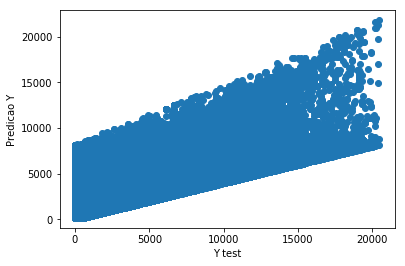

In [130]:
#gráfico de dispersão com base na predição
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicao Y')

In [131]:
from sklearn import metrics

In [132]:
#erros do modelo
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction))**0.5)

MAE: 1947.5209592581423
MSE: 7334299.01943929
RMSE: 52.04028340900651


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


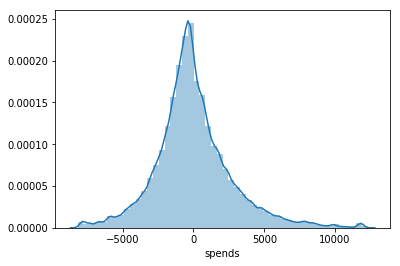

In [133]:
#distribuição de gals dos erros
sns.distplot(y_test-prediction)

In [134]:
#avaliação do modelo
coef = pd.DataFrame(lm.coef_, x.columns, columns=['Coefs'])
coef

,Coefs
credit_line,0.400530
revolving_balance,0.674649
month,1.720439


In [139]:
##simula dados de x valor gasto
preditor = lm.predict([[2000, 300, 1]])
preditor

array([955.13854364])

In [140]:
## importação de bibliotecas para realização de classificação de clientes

In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [142]:
X = desafio[[
    'risk_rate',
    'credit_limit',
    'income',
    'n_bankruptcies',
    'n_defaulted_loans',
    'n_accounts',
    'n_issues'
]]

In [143]:
X = normalize(X.as_matrix())

In [144]:
kmeans = KMeans(
    n_clusters = 9, # testar diferentes valores
    n_init = 15, 
    max_iter = 450, 
    init = 'k-means++'
)

In [145]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=450,
    n_clusters=9, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [146]:
desafio['cluster'] = kmeans.labels_ # adiciona coluna c/ cluster
grouped = desafio.groupby('cluster')
stacked = pd.DataFrame()
for group in grouped:
    means = group[1].mean(axis = 0)
    stacked[group[0]] = means
print(stacked)

                                                             0             1  \
score_3                                           3.135418e+02  3.792482e+02   
score_4                                           9.996783e+01  1.000083e+02   
score_5                                           5.018757e-01  4.995353e-01   
score_6                                           1.000271e+02  9.996976e+01   
risk_rate                                         2.995097e-01  2.949438e-01   
last_amount_borrowed                              1.630544e+04  1.226210e+04   
last_borrowed_in_months                           4.202446e+01  4.148384e+01   
credit_limit                                      1.740614e+04  4.150356e+04   
income                                            1.042473e+05  5.864877e+04   
ok_since                                          3.379732e+01  3.606649e+01   
n_bankruptcies                                    6.774754e-02  7.665377e-02   
n_defaulted_loans                       